# CREMP Data Analysis
## Exploratory Data Analysis and Future Outlook
Analyzed coral reef data to inform conservation strategies, addressing stony coral cover, species richness, octocoral density, LTA differences, and spatial patterns.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import numpy as np
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
import os

# Define the path to the folder containing CSV files
folder_path = "C:/Users/Guna/Downloads/CREMP_CSV_files"

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load the datasets
def load_csv(file_name):
    file_path = os.path.join(folder_path, file_name)
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"⚠️ Failed to read {file_name}: {e}")
        return None

# Load all files
cremp_octo_raw = load_csv("CREMP_OCTO_RawData_2023.csv")
cremp_octo_summaries_density = load_csv("CREMP_OCTO_Summaries_2023_Density.csv")
cremp_octo_summaries_meanheight = load_csv("CREMP_OCTO_Summaries_2023_MeanHeight.csv")
cremp_pcover_stonycorals = load_csv("CREMP_Pcover_2023_StonyCoralSpecies.csv")
cremp_pcover_taxagroups = load_csv("CREMP_Pcover_2023_TaxaGroups.csv")
cremp_scor_rawdata = load_csv("CREMP_SCOR_RawData_2023.csv")
cremp_scor_summaries_conditioncounts = load_csv("CREMP_SCOR_Summaries_2023_ConditionCounts.csv")
cremp_scor_summaries_counts = load_csv("CREMP_SCOR_Summaries_2023_Counts.csv")
cremp_scor_summaries_density = load_csv("CREMP_SCOR_Summaries_2023_Density.csv")
cremp_scor_summaries_lta = load_csv("CREMP_SCOR_Summaries_2023_LTA.csv")
cremp_stations = load_csv("CREMP_Stations_2023.csv")
cremp_temperatures = load_csv("CREMP_Temperatures_2023.csv")

# Cleaning
cremp_pcover_taxagroups.dropna(subset=['Date'], inplace=True)
cremp_pcover_stonycorals.dropna(subset=['Date'], inplace=True)
cremp_octo_summaries_density['Total_Octocorals'].fillna(cremp_octo_summaries_density['Total_Octocorals'].mean(), inplace=True)
annual_temps = cremp_temperatures.groupby(['SiteID', 'Year'])['TempC'].mean().reset_index()
sns.set_style('whitegrid')

C:\Users\Guna\AppData\Local\Temp\ipykernel_6748\1309318034.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cremp_octo_summaries_density['Total_Octocorals'].fillna(cremp_octo_summaries_density['Total_Octocorals'].mean(), inplace=True)


## Objective 1: Stony Coral Percentage Cover
Area plot shows declining trends, and heatmap highlights site differences.

<Figure size 1200x600 with 0 Axes>

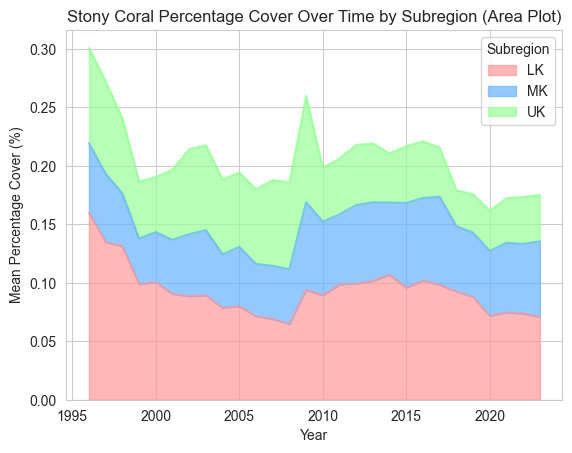

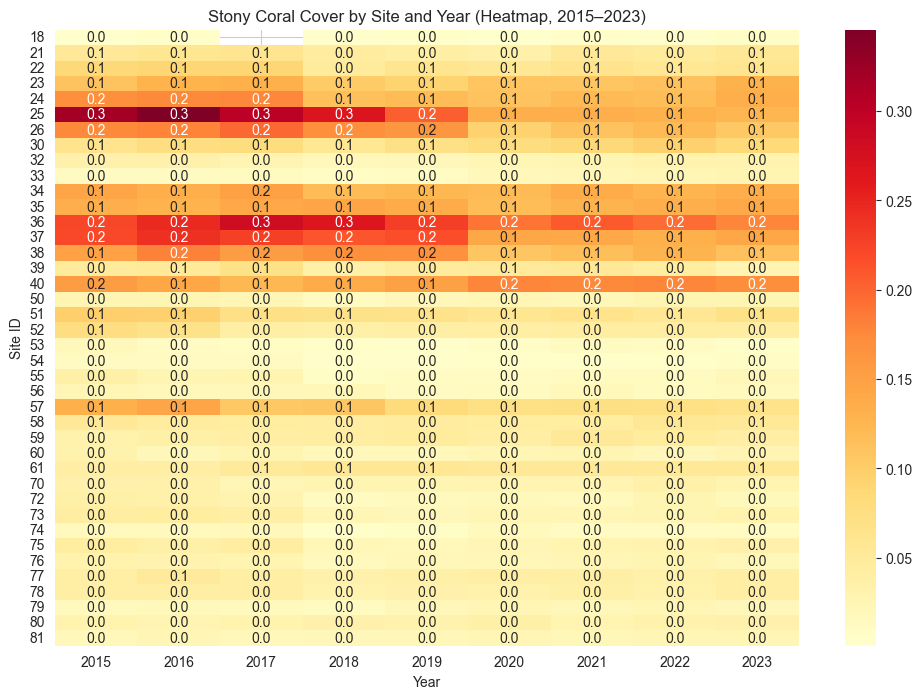

In [23]:
plt.figure(figsize=(12, 6))

# Explicit colors for each Subregion
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Replace with your preferred hex codes
pivot_cover.plot(kind='area', stacked=True, color=colors, alpha=0.7)

# Customizing plot
plt.title('Stony Coral Percentage Cover Over Time by Subregion (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Mean Percentage Cover (%)')
plt.legend(title='Subregion')
plt.savefig('objective1_area_customcolors.png')  # Save with a new filename
plt.show()


recent_cover = cremp_pcover_taxagroups[cremp_pcover_taxagroups['Year'] >= 2015]
pivot_site = recent_cover.pivot_table(values='Stony_coral', index='SiteID', columns='Year', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_site, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Stony Coral Cover by Site and Year (Heatmap, 2015–2023)')
plt.xlabel('Year')
plt.ylabel('Site ID')
plt.savefig('objective1_heatmap.png')
plt.show()

## Objective 2: Species Richness
Step plot shows discrete richness changes, and violin plot compares distributions.

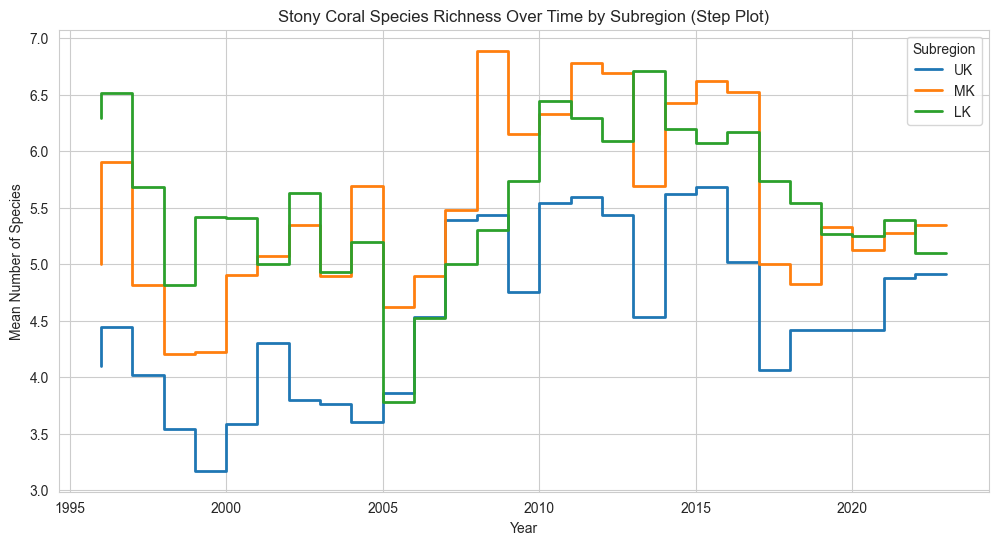

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\3847342632.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Subregion', y='Richness', data=cremp_pcover_stonycorals, palette='Set2')


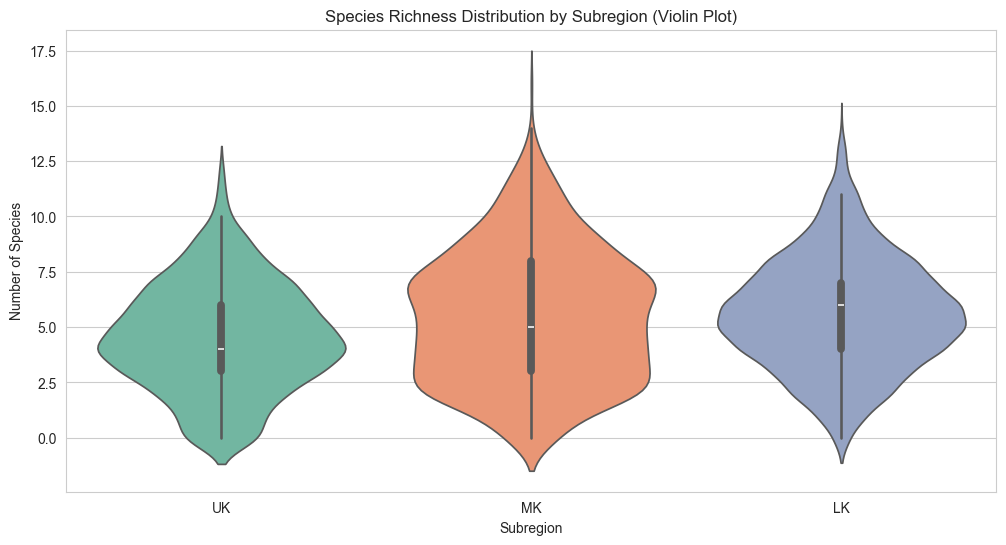

In [9]:
species_cols = [col for col in cremp_pcover_stonycorals.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
cremp_pcover_stonycorals['Richness'] = (cremp_pcover_stonycorals[species_cols] > 0).sum(axis=1)

plt.figure(figsize=(12, 6))
for subregion in cremp_pcover_stonycorals['Subregion'].unique():
    sub_data = cremp_pcover_stonycorals[cremp_pcover_stonycorals['Subregion'] == subregion].groupby('Year')['Richness'].mean()
    plt.step(sub_data.index, sub_data.values, label=subregion, linewidth=2)
plt.title('Stony Coral Species Richness Over Time by Subregion (Step Plot)')
plt.xlabel('Year')
plt.ylabel('Mean Number of Species')
plt.legend(title='Subregion')
plt.savefig('objective2_step.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Subregion', y='Richness', data=cremp_pcover_stonycorals, palette='Set2')
plt.title('Species Richness Distribution by Subregion (Violin Plot)')
plt.xlabel('Subregion')
plt.ylabel('Number of Species')
plt.savefig('objective2_violin.png')
plt.show()

## Objective 3: Octocoral Density
Stacked bar shows species contributions, and strip plot compares sites.

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\3243547085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cremp_octo_summaries_density[col].fillna(0, inplace=True)


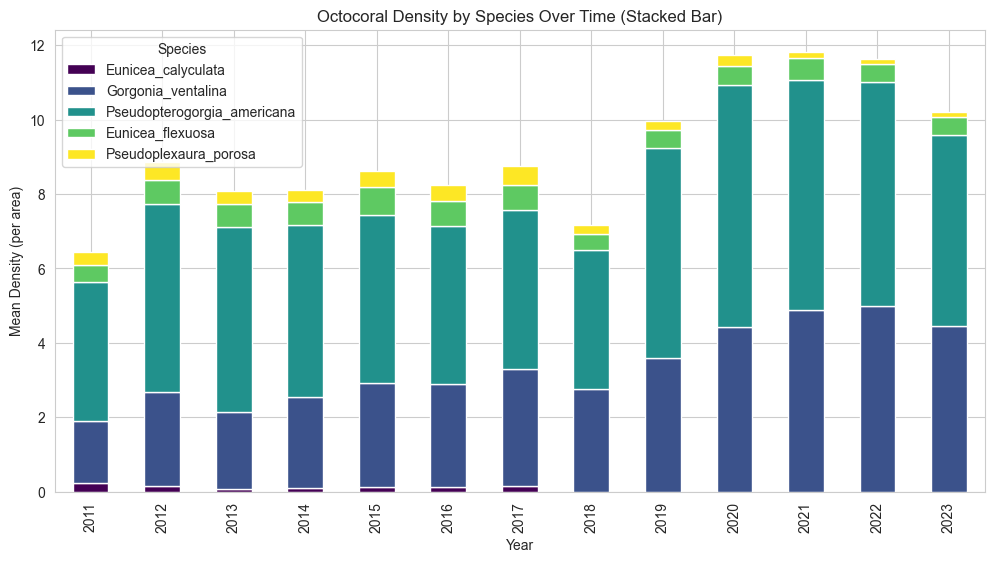

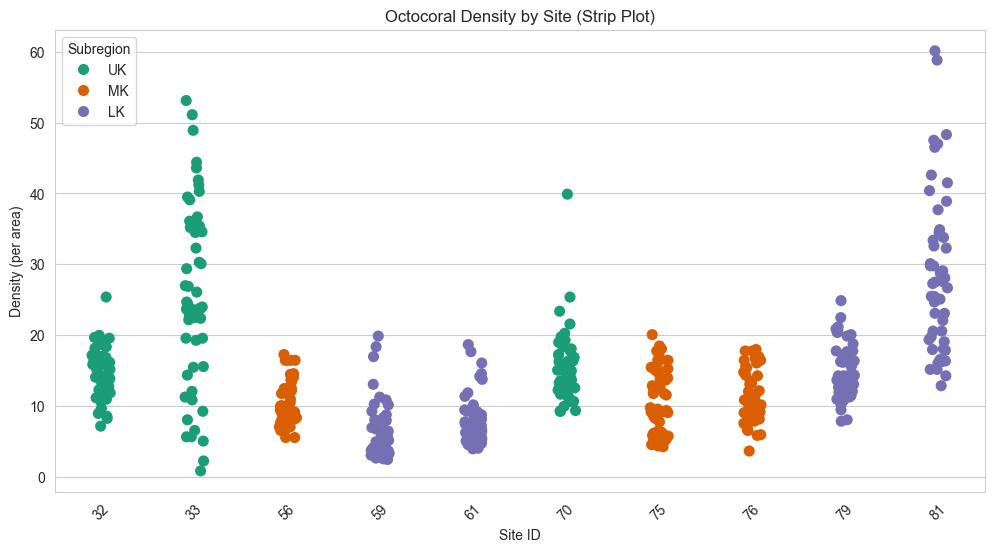

In [10]:
octo_species = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']
for col in octo_species:
    cremp_octo_summaries_density[col].fillna(0, inplace=True)
pivot_octo = cremp_octo_summaries_density.groupby('Year')[octo_species].mean()
pivot_octo.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Octocoral Density by Species Over Time (Stacked Bar)')
plt.xlabel('Year')
plt.ylabel('Mean Density (per area)')
plt.legend(title='Species')
plt.savefig('objective3_bar.png')
plt.show()

top_sites = cremp_octo_summaries_density['SiteID'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.stripplot(x='SiteID', y='Total_Octocorals', hue='Subregion', data=cremp_octo_summaries_density[cremp_octo_summaries_density['SiteID'].isin(top_sites)], palette='Dark2', size=8)
plt.title('Octocoral Density by Site (Strip Plot)')
plt.xlabel('Site ID')
plt.ylabel('Density (per area)')
plt.xticks(rotation=45)
plt.legend(title='Subregion')
plt.savefig('objective3_strip.png')
plt.show()

## Objective 4: LTA Differences
Bar plot shows mean LTA, and ANOVA confirms significance.

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\3134749793.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Subregion', y='Siderastrea_siderea', data=cremp_scor_summaries_lta, ci='sd', palette='muted')
C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\3134749793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subregion', y='Siderastrea_siderea', data=cremp_scor_summaries_lta, ci='sd', palette='muted')


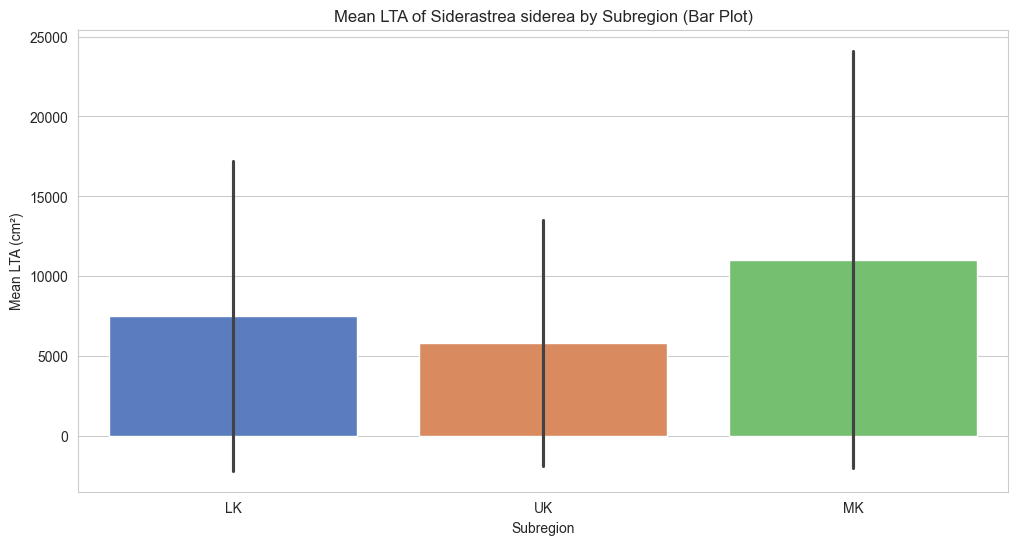

ANOVA for Siderastrea_siderea LTA: F=202.59, p=0.0000
Significant LTA differences between sites (p < 0.05).


In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Subregion', y='Siderastrea_siderea', data=cremp_scor_summaries_lta, ci='sd', palette='muted')
plt.title('Mean LTA of Siderastrea siderea by Subregion (Bar Plot)')
plt.xlabel('Subregion')
plt.ylabel('Mean LTA (cm²)')
plt.savefig('objective4_bar.png')
plt.show()

lta_groups = [cremp_scor_summaries_lta[cremp_scor_summaries_lta['SiteID'] == site]['Siderastrea_siderea'].dropna() for site in cremp_scor_summaries_lta['SiteID'].unique()]
stat, p = f_oneway(*lta_groups)
print(f'ANOVA for Siderastrea_siderea LTA: F={stat:.2f}, p={p:.4f}')
if p < 0.05:
    print('Significant LTA differences between sites (p < 0.05).')
else:
    print('No significant LTA differences (p >= 0.05).')

## Objective 5: Spatial Distribution
Geopandas map and plotly animation show spatial and temporal patterns.

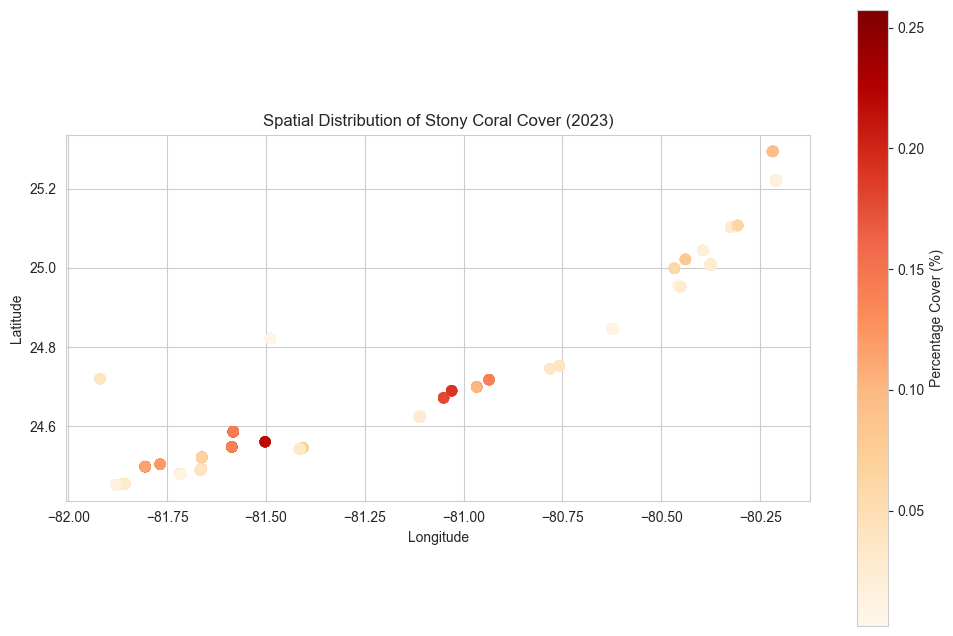

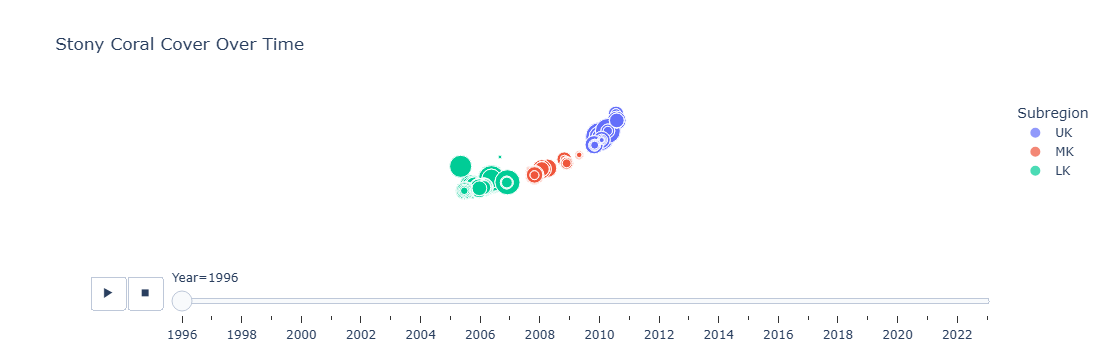

In [12]:
gdf = gpd.GeoDataFrame(
    cremp_pcover_taxagroups.merge(cremp_stations[['SiteID', 'latDD', 'lonDD']], on='SiteID'),
    geometry=gpd.points_from_xy(cremp_pcover_taxagroups.merge(cremp_stations[['SiteID', 'latDD', 'lonDD']], on='SiteID')['lonDD'], cremp_pcover_taxagroups.merge(cremp_stations[['SiteID', 'latDD', 'lonDD']], on='SiteID')['latDD'])
)
fig, ax = plt.subplots(figsize=(12, 8))
gdf[gdf['Year'] == 2023].plot(column='Stony_coral', ax=ax, cmap='OrRd', markersize=50, legend=True, legend_kwds={'label': 'Percentage Cover (%)'})
plt.title('Spatial Distribution of Stony Coral Cover (2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('objective5_map.png')
plt.show()

spatial_data = cremp_pcover_taxagroups.merge(cremp_stations[['SiteID', 'latDD', 'lonDD']], on='SiteID')
fig = px.scatter_geo(spatial_data, lat='latDD', lon='lonDD', size='Stony_coral', color='Subregion',
                     animation_frame='Year', title='Stony Coral Cover Over Time', hover_data=['SiteID', 'Stony_coral'])
fig.update_geos(fitbounds='locations', visible=False)
fig.show()

## Relationships and Correlations
Scatter plots show density-richness and octocoral-temperature relationships.

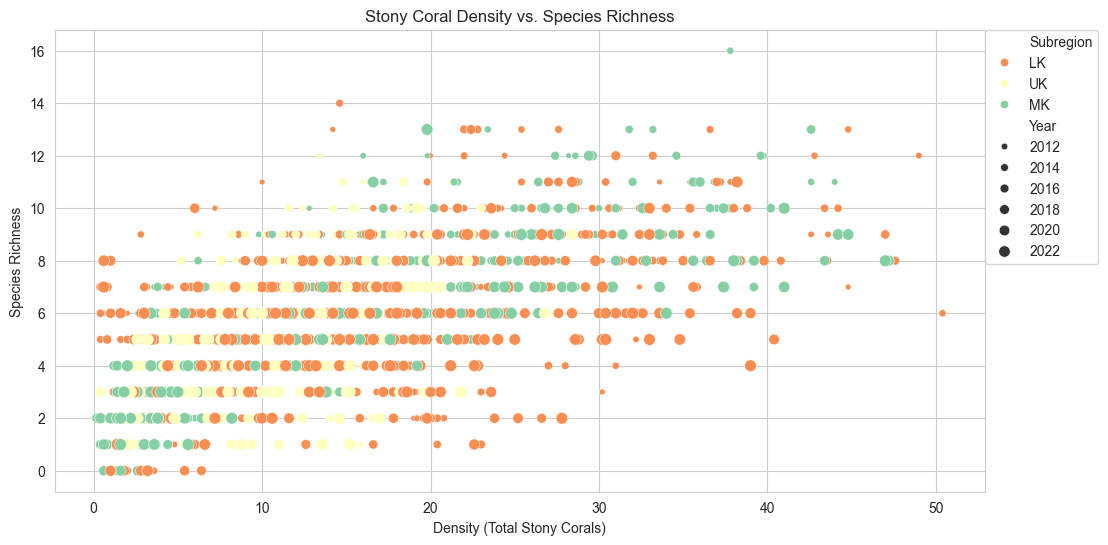

Correlation: 0.6350443538445445


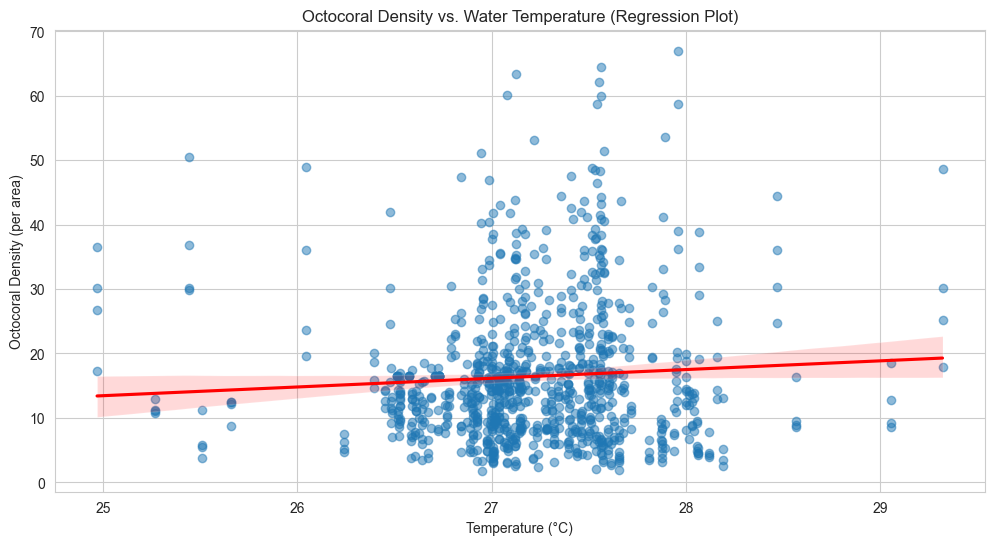

Correlation: 0.06677668444819891


In [20]:
# Calculate Total_StonyCorals
species_cols = [col for col in cremp_scor_summaries_density.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years']]
cremp_scor_summaries_density['Total_StonyCorals'] = cremp_scor_summaries_density[species_cols].sum(axis=1)

density_richness = pd.merge(
    cremp_scor_summaries_density[['Year', 'SiteID', 'StationID', 'Subregion', 'Total_StonyCorals']],
    cremp_pcover_stonycorals[['Year', 'SiteID', 'StationID', 'Richness']],
    on=['Year', 'SiteID', 'StationID']
)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_StonyCorals', y='Richness', hue='Subregion', size='Year', data=density_richness, palette='Spectral')
plt.title('Stony Coral Density vs. Species Richness')
plt.xlabel('Density (Total Stony Corals)')
plt.ylabel('Species Richness')
plt.savefig('correlation_density_richness.png')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()
print('Correlation:', density_richness['Total_StonyCorals'].corr(density_richness['Richness']))

octo_temp = pd.merge(
    cremp_octo_summaries_density[['Year', 'SiteID', 'StationID', 'Total_Octocorals']],
    annual_temps,
    on=['Year', 'SiteID']
)
plt.figure(figsize=(12, 6))
sns.regplot(x='TempC', y='Total_Octocorals', data=octo_temp, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Octocoral Density vs. Water Temperature (Regression Plot)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Octocoral Density (per area)')
plt.savefig('correlation_octo_temp.png')
plt.show()
print('Correlation:', octo_temp['TempC'].corr(octo_temp['Total_Octocorals']))

## Regional Comparison
Box plot and facet grid compare density, cover, and richness.

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\1839344322.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




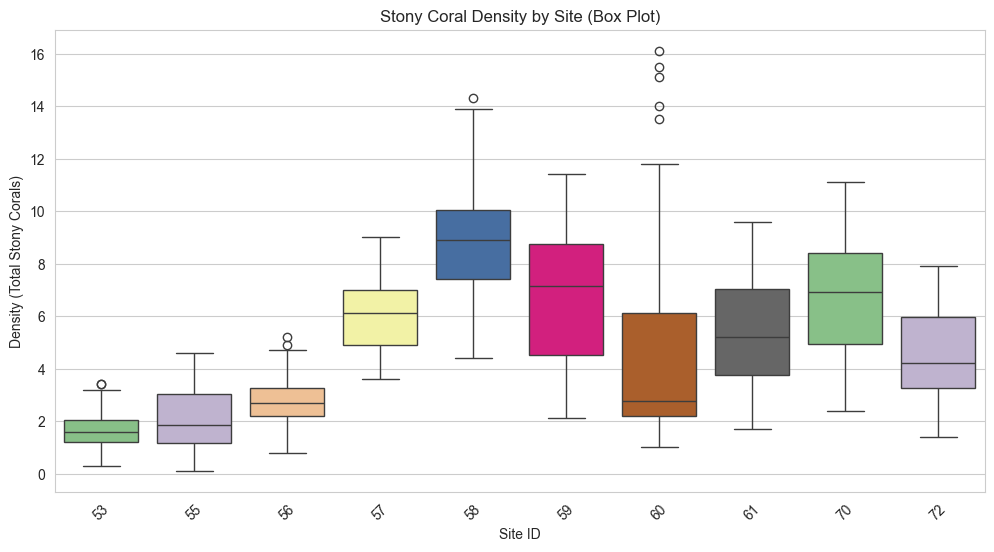

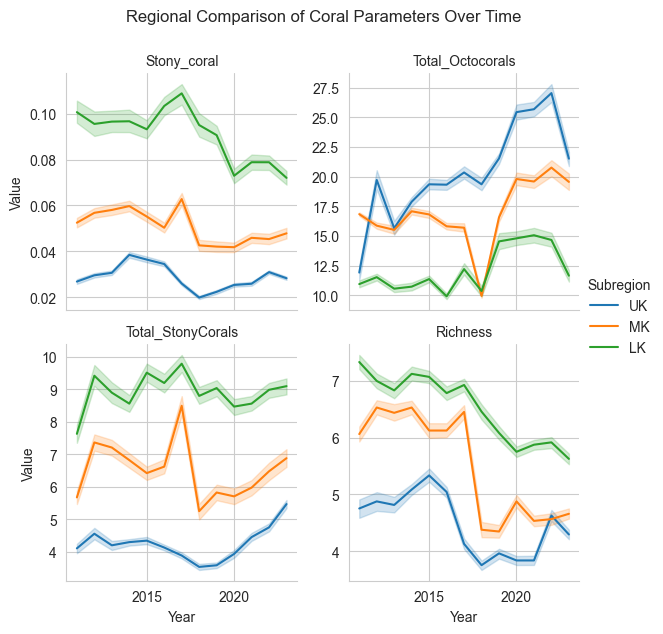

In [14]:
top_sites = cremp_scor_summaries_density['SiteID'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='SiteID', y='Total_StonyCorals', data=cremp_scor_summaries_density[cremp_scor_summaries_density['SiteID'].isin(top_sites)], palette='Accent')
plt.title('Stony Coral Density by Site (Box Plot)')
plt.xlabel('Site ID')
plt.ylabel('Density (Total Stony Corals)')
plt.xticks(rotation=45)
plt.savefig('regional_density.png')
plt.show()

merged_data = pd.merge(
    cremp_pcover_taxagroups[['Year', 'SiteID', 'Subregion', 'Stony_coral']],
    cremp_octo_summaries_density[['Year', 'SiteID', 'Total_Octocorals']],
    on=['Year', 'SiteID'], how='inner'
).merge(
    cremp_scor_summaries_density[['Year', 'SiteID', 'Total_StonyCorals']],
    on=['Year', 'SiteID']
).merge(
    cremp_pcover_stonycorals[['Year', 'SiteID', 'Richness']],
    on=['Year', 'SiteID']
)
melted_data = pd.melt(merged_data, id_vars=['Year', 'Subregion'], value_vars=['Stony_coral', 'Total_Octocorals', 'Total_StonyCorals', 'Richness'], var_name='Parameter', value_name='Value')
g = sns.FacetGrid(melted_data, col='Parameter', hue='Subregion', col_wrap=2, sharey=False)
g.map(sns.lineplot, 'Year', 'Value')
g.add_legend(title='Subregion')
g.set_titles('{col_name}')
plt.suptitle('Regional Comparison of Coral Parameters Over Time', y=1.05)
plt.savefig('regional_facet.png')
plt.show()

## Future Outlook
Correlation matrix identifies factors, scatter plot flags declines, and regression predicts trends.

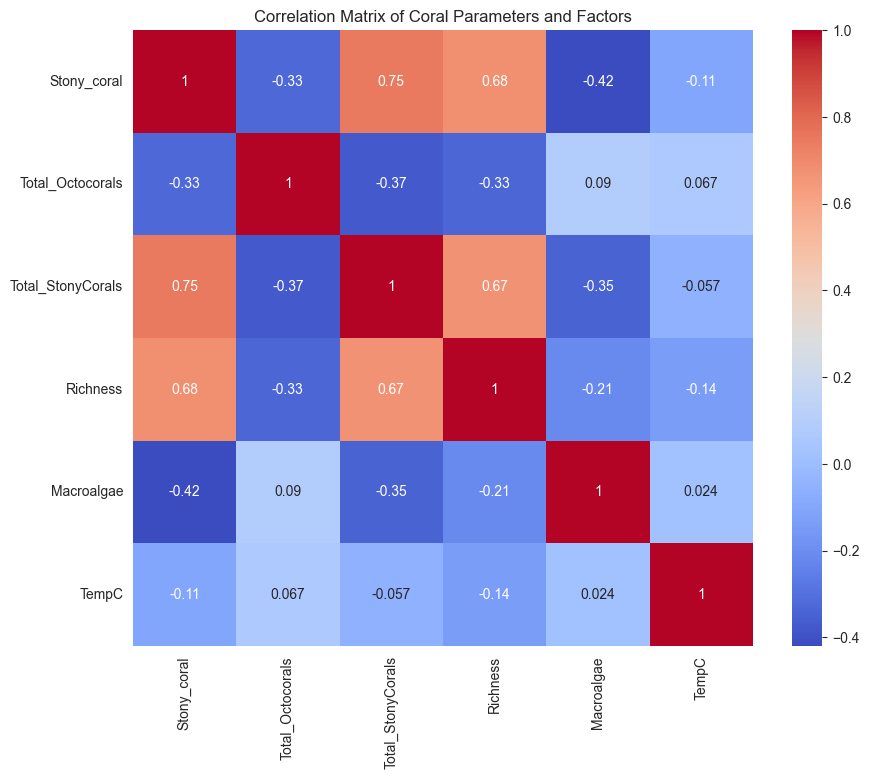

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\56707411.py:21: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\Guna\AppData\Local\Temp\ipykernel_19048\56707411.py:22: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



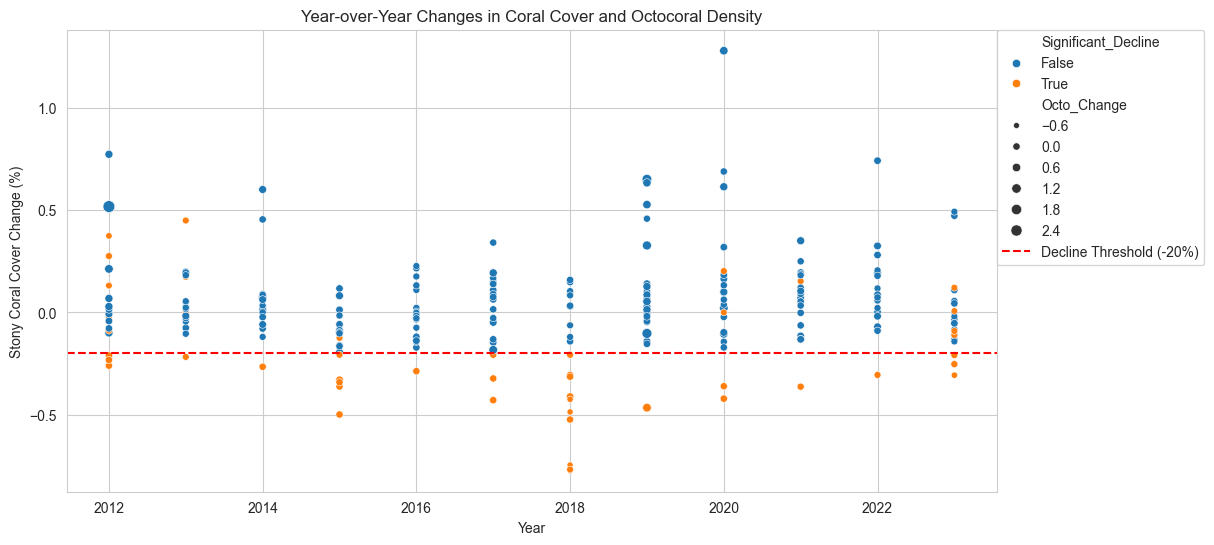

Sites with Significant Declines:
     SiteID  Year  Cover_Change  Octo_Change
4        26  2020     -0.421190     0.000000
13       32  2017     -0.206562    -0.082245
14       32  2018     -0.304511    -0.186344
23       33  2015     -0.361783    -0.033730
26       33  2018     -0.313620     0.008574
32       34  2012      0.131285    -0.273678
38       34  2018     -0.206897    -0.172414
41       34  2021      0.152844    -0.214660
44       35  2012     -0.022609    -0.291874
62       36  2018     -0.060577    -0.224576
76       38  2020     -0.360539    -0.054878
81       50  2013      0.000000    -0.277020
86       50  2018     -0.411088     0.108040
94       52  2017     -0.428624     0.011842
107      54  2018     -0.745491    -0.526652
117      55  2016     -0.286897    -0.012071
119      55  2018     -0.773381    -0.607595
125      56  2012      0.374263    -0.366174
127      56  2014     -0.265306    -0.014493
128      56  2015     -0.124074    -0.218137
132      56  2019     

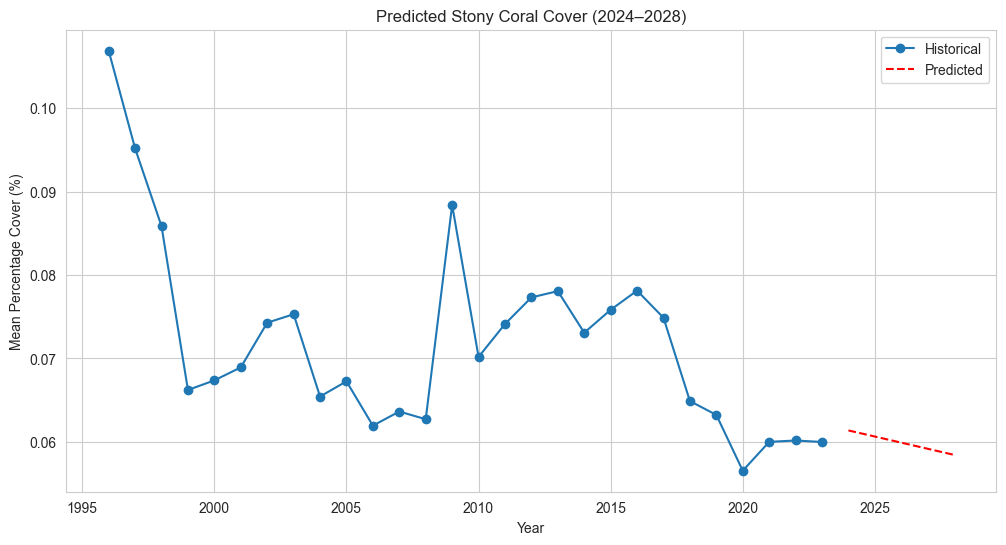

Predictions for 2024–2028:
2024: 0.06%
2025: 0.06%
2026: 0.06%
2027: 0.06%
2028: 0.06%


In [19]:
corr_data = pd.merge(
    cremp_pcover_taxagroups[['Year', 'SiteID', 'Stony_coral', 'Macroalgae']],
    cremp_octo_summaries_density[['Year', 'SiteID', 'Total_Octocorals']],
    on=['Year', 'SiteID'], how='inner'
).merge(
    cremp_scor_summaries_density[['Year', 'SiteID', 'Total_StonyCorals']],
    on=['Year', 'SiteID']
).merge(
    cremp_pcover_stonycorals[['Year', 'SiteID', 'Richness']],
    on=['Year', 'SiteID']
).merge(
    annual_temps,
    on=['Year', 'SiteID']
)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data[['Stony_coral', 'Total_Octocorals', 'Total_StonyCorals', 'Richness', 'Macroalgae', 'TempC']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Coral Parameters and Factors')
plt.savefig('future_factors.png')
plt.show()

cover_change = cremp_pcover_taxagroups.groupby(['SiteID', 'Year'])['Stony_coral'].mean().unstack().pct_change(axis=1).stack().reset_index(name='Cover_Change')
octo_change = cremp_octo_summaries_density.groupby(['SiteID', 'Year'])['Total_Octocorals'].mean().unstack().pct_change(axis=1).stack().reset_index(name='Octo_Change')
declines = pd.merge(cover_change, octo_change, on=['SiteID', 'Year'], how='inner')
declines['Significant_Decline'] = (declines['Cover_Change'] < -0.2) | (declines['Octo_Change'] < -0.2)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Cover_Change', hue='Significant_Decline', size='Octo_Change', data=declines)
plt.axhline(-0.2, color='red', linestyle='--', label='Decline Threshold (-20%)')
plt.title('Year-over-Year Changes in Coral Cover and Octocoral Density')
plt.xlabel('Year')
plt.ylabel('Stony Coral Cover Change (%)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.savefig('future_indicators.png')
plt.show()
print('Sites with Significant Declines:')
print(declines[declines['Significant_Decline']][['SiteID', 'Year', 'Cover_Change', 'Octo_Change']])

model_data = cremp_pcover_taxagroups.groupby('Year')['Stony_coral'].mean().reset_index()
X = model_data[['Year']].values
y = model_data['Stony_coral'].values
model = LinearRegression().fit(X, y)
future_years = np.array([[year] for year in range(2024, 2029)])
predictions = model.predict(future_years)
plt.figure(figsize=(12, 6))
plt.plot(model_data['Year'], model_data['Stony_coral'], 'o-', label='Historical')
plt.plot(range(2024, 2029), predictions, 'r--', label='Predicted')
plt.title('Predicted Stony Coral Cover (2024–2028)')
plt.xlabel('Year')
plt.ylabel('Mean Percentage Cover (%)')
plt.legend()
plt.savefig('future_model.png')
plt.show()
print('Predictions for 2024–2028:')
for year, pred in zip(range(2024, 2029), predictions):
    print(f'{year}: {pred:.2f}%')

## Conclusions and Recommendations
- **Key Findings**: Declining stony coral cover, stable octocoral density, and temperature impacts.
- **Conservation**: Prioritize restoration in Lower Keys, monitor temperature-sensitive sites.
- **Future Work**: Refine models with additional factors (e.g., pH, pollution).